# 합성곱 연산

## 합성곱 이해

In [ ]:
# 합성곱 연산은 필터(커널)를 이미지에 적용해 특정한 특징을 추출하는 작업입니다. 
#이 작업은 이미지의 작은 영역에 필터를 움직여가며 합성곱을 수행하는 것으로 이루어집니다. 
# 이를 수학적으로 표현하면, 필터와 이미지의 각 영역의 요소를 곱한 후 더한 값을 출력합니다.


In [ ]:
# 합성곱 수학적 설명:
# 주어진 필터(커널)와 이미지에 대해, 필터가 이미지의 작은 부분을 순서대로 이동하면서 각 필터 요소와 해당 이미지 영역의 요소를 곱한 후 그 합을 구합니다.
# 예를 들어,  3 × 3크기의 필터를  5 × 5 이미지에 적용한다고 가정하면, 다음과 같은 방식으로 연산이 이루어집니다.

## 코드 설명

In [ ]:
# 코드 설명:
# 이미지와 필터(커널)를 각각 5x5, 3x3 크기의 행렬로 정의합니다.

In [ ]:
# image: 합성곱 연산을 수행할 입력 이미지입니다.
# kernel: 3x3 크기의 필터로, 특징을 추출하기 위해 사용됩니다.
# 출력 크기는 필터가 이동할 수 있는 범위에 따라 결정됩니다. 입력 이미지의 크기에서 필터 크기를 뺀 값에 1을 더한 크기로 결정됩니다.

# 합성곱 연산은 이미지의 각 위치에서 필터를 적용하여 이루어집니다.

# region = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]: 필터 크기만큼 이미지의 영역을 선택합니다.
# np.sum(region * kernel): 선택된 이미지 영역과 필터 요소별로 곱하고 그 합을 구하여 출력 배열에 저장합니다.

# 최종적으로 합성곱 결과를 출력합니다.

In [1]:
import numpy as np

# 이미지 (5x5 행렬로 표현)
image = np.array([[1, 2, 0, 1, 2],
                  [0, 1, 2, 0, 1],
                  [2, 1, 0, 1, 2],
                  [1, 0, 1, 2, 0],
                  [0, 2, 1, 0, 1]])

# 필터(커널) (3x3 행렬로 표현)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 출력 크기 계산 (Stride=1, Padding=0)
output_height = image.shape[0] - kernel.shape[0] + 1
output_width = image.shape[1] - kernel.shape[1] + 1

# 출력 행렬 초기화
output = np.zeros((output_height, output_width))

# 합성곱 연산 수행
for i in range(output_height):
    for j in range(output_width):
        # 이미지의 현재 위치에서 커널과 곱한 후 더한 값을 저장
        region = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
        output[i, j] = np.sum(region * kernel)

print("입력 이미지:\n", image)
print("필터(커널):\n", kernel)
print("합성곱 결과:\n", output)


입력 이미지:
 [[1 2 0 1 2]
 [0 1 2 0 1]
 [2 1 0 1 2]
 [1 0 1 2 0]
 [0 2 1 0 1]]
필터(커널):
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
합성곱 결과:
 [[ 1.  2. -3.]
 [ 0. -1.  0.]
 [ 1.  0. -1.]]


In [ ]:
# 설명:
# 필터가 이미지에서 한 칸씩 움직이며 합성곱 연산을 수행합니다.
# 필터는 주로 가중치 역할을 하여 이미지의 특정 특징(예: 가장자리, 패턴 등)을 추출하는 데 사용됩니다.
# 출력된 결과는 입력 이미지에서 필터로 추출된 특징이 반영된 새로운 특성 맵입니다.
# 이 코드 예시는 CNN에서 중요한 합성곱 연산이 어떻게 수행되는지를 보여줍니다.

# Padding

## 패딩 없이 합성곱 (valid padding)

In [ ]:
# 패딩 없이 합성곱 (Valid Padding):

# 입력 데이터와 필터를 사용하여 패딩 없이 합성곱 연산을 수행합니다.
# 출력 크기는 필터 크기만큼 줄어들며, 입력 크기보다 작아집니다.


In [3]:
import numpy as np
def conv2d(input_data, kernel, stride=1, padding=0):
    # 입력 크기
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape

    # 출력 크기 계산 (Valid Padding)
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    # 출력 초기화
    output = np.zeros((output_height, output_width))
    
    # 패딩이 없는 경우
    padded_input = input_data

    # 합성곱 연산
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(padded_input[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return output

# 입력 데이터 (5x5)
input_data = np.array([[1, 2, 3, 0, 1],
                       [0, 1, 2, 3, 1],
                       [1, 2, 3, 1, 2],
                       [2, 1, 0, 2, 3],
                       [1, 1, 2, 1, 0]])

# 필터(커널) (3x3)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# 패딩 없이 합성곱 수행
output_valid = conv2d(input_data, kernel, stride=1, padding=0)
print("Valid Padding (No Padding) 결과:")
print(output_valid)


Valid Padding (No Padding) 결과:
[[-6.  1.  4.]
 [-2. -2. -1.]
 [-1.  0.  0.]]


In [ ]:
# 결론:
# Valid Padding: 패딩 없이 합성곱을 수행한 경우, 입력 크기가 줄어듭니다.

## 패딩을 적용한 합성곱 (same padding)

In [ ]:
# 패딩 적용한 합성곱 (Same Padding):

# 입력 데이터에 패딩을 추가하여 합성곱 연산을 수행합니다. 패딩 크기 
# 𝑃=1을 적용하여 입력 이미지가 0으로 채워집니다.
# 출력 크기는 입력 크기와 동일하게 유지됩니다.

In [4]:
import numpy as np

def conv2d_with_padding(input_data, kernel, stride=1, padding=1):
    # 입력 크기
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape

    # 출력 크기 계산 (Same Padding)
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    
    # 입력에 패딩 추가 (가장자리 0으로 채우기)
    padded_input = np.pad(input_data, ((padding, padding), (padding, padding)), mode='constant')

    # 출력 초기화
    output = np.zeros((output_height, output_width))

    # 합성곱 연산
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(padded_input[i:i + kernel_height, j:j + kernel_width] * kernel)
    
    return output

# 패딩 적용한 합성곱 수행
output_same = conv2d_with_padding(input_data, kernel, stride=1, padding=1)
print("\nSame Padding (Padding = 1) 결과:")
print(output_same)



Same Padding (Padding = 1) 결과:
[[-3. -4.  0.  3.  3.]
 [-5. -6.  1.  4.  4.]
 [-4. -2. -2. -1.  6.]
 [-4. -1.  0.  0.  4.]
 [-2.  1. -1. -1.  3.]]


In [ ]:
# Same Padding: 입력 이미지에 패딩을 추가하여 출력 크기를 입력 크기와 동일하게 유지합니다.

# Pooling 

In [ ]:
# Pooling은 CNN(Convolutional Neural Network) 모델에서 차원을 축소하고, 
# 연산량을 줄이며, 중요한 특징을 유지하면서 모델의 과적합을 방지하기 위해 사용되는 중요한 연산입니다. 

In [ ]:
# 가장 많이 사용되는 풀링 방식에는 **최대 풀링(Max Pooling)**과 **평균 풀링(Average Pooling)**이 있습니다.

## Max Pooling

In [ ]:
# Max Pooling(최대 풀링): 영역 내에서 가장 큰 값을 선택하여 그 영역을 대표합니다.

## 데이터 전처리

In [11]:
# MNIST 데이터셋을 CNN에 적합한 형태로 변환하고 정규화하는 작업을 수행합니다

1. 데이터 준비 (MNIST 데이터셋 로드)

## 라이브러리,데이터 준비, 데이터 전처리

2. 데이터 전처리 (reshape 및 정규화)

x_train = x_train.reshape(-1, 28, 28, 1)

In [12]:
# 목적: CNN 모델에 입력할 수 있도록 이미지의 형태를 변환합니다.
# reshape() 함수는 입력 데이터의 차원을 변경합니다.
# 입력 데이터: x_train은 MNIST 데이터셋의 이미지 데이터로, 크기가 (60000, 28, 28)입니다. 
#이는 60,000개의 28x28 크기의 이미지들이 포함된 3D 배열입니다.

# -1: -1은 남은 차원을 자동으로 계산하라는 의미입니다. 60,000개의 샘플이 있으므로, reshape 후 첫 번째 차원은 60,000으로 자동 계산됩니다.
# 28, 28: 각 샘플 이미지는 28x28 크기의 2D 배열입니다.
# 1: 마지막 차원인 1은 채널을 의미합니다. MNIST 데이터셋은 흑백 이미지로, 채널 수가 1입니다. 만약 컬러 이미지였다면 채널 수가 3(RGB)을 가질 것입니다.

# x_train.reshape(-1, 28, 28, 1) : 60,000개의 28x28 크기의 흑백 이미지를 CNN에서 처리할 수 있도록 4D 텐서로 변환하는 작업입니다. 
# CNN의 합성곱 계층은 4차원 텐서를 입력으로 받습니다. (배치 크기, 높이, 너비, 채널)

x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
# 목적: 테스트 데이터셋(x_test)도 CNN에 입력할 수 있도록 동일한 방식으로 차원을 변환합니다.
# 입력 데이터: x_test는 10,000개의 28x28 크기 이미지들로 구성되어 있으며, 이를 (10000, 28, 28, 1) 크기로 변환합니다.

x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# 목적: 이미지 데이터를 정규화하여 학습이 더 효율적으로 이루어지도록 만듭니다.
# MNIST 데이터셋의 각 픽셀 값은 0부터 255까지의 값을 가집니다. 픽셀 값이 0이면 검정색, 255면 흰색을 의미합니다.
# 정규화 과정:
# x_train / 255.0: 픽셀 값을 0~255 범위에서 0~1 범위로 변환하는 작업입니다. 
# CNN 모델은 입력 값이 0~1 범위에 있을 때 더 빠르고 안정적으로 학습할 수 있기 때문에, 이 작업을 통해 데이터를 정규화합니다.
# x_test / 255.0: 테스트 데이터셋도 동일한 방식으로 정규화됩니다.

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비 (MNIST 데이터셋 로드)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리 (reshape 및 정규화)
x_train = x_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)로 변환
x_test = x_test.reshape(-1, 28, 28, 1)    # (10000, 28, 28, 1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0  # 0~1로 정규화

3. CNN 모델 정의

In [ ]:
#  합성곱(Convolution) 층과 풀링(Pooling) 층을 정의한 부분입니다. 이를 통해 이미지에서 중요한 특징을 추출하고 
#     차원을 축소하여 모델의 복잡성을 줄이면서도 중요한 정보는 유지하는 역할을 합니다.

In [16]:
# Max Pooling 코드 설명:
# MaxPooling2D 층:

# layers.MaxPooling2D(pool_size=(2, 2)): 2x2 영역에서 최대 풀링을 적용합니다. 이는 입력 이미지의 크기를 1/2로 줄입니다.
# Max Pooling은 주어진 영역에서 가장 큰 값을 선택하여 그 값을 해당 영역의 대표 값으로 사용합니다.
# 예를 들어, 입력 이미지가 28x28 크기라면 첫 번째 Max Pooling이 적용된 후 출력은 14x14로 줄어듭니다.

# 풀링 과정:

# 풀링을 통해 이미지의 크기가 축소되면서 중요한 특징을 유지합니다.
# 첫 번째 합성곱 이후 Max Pooling을 적용하여 출력의 크기를 줄이고, 두 번째 합성곱 이후에도 동일한 방식으로 크기를 줄입니다.

첫 번째 합성곱 및 풀링 층

In [ ]:
# 합성곱 층 (Conv2D):
# Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):
# 32개의 필터(커널): 입력 이미지에 32개의 필터를 적용하여 32개의 특징 맵을 생성합니다. 각 필터는 이미지에서 서로 다른 패턴을 학습합니다.
# (3, 3): 필터의 크기가 3x3임을 의미합니다. 즉, 3x3 크기의 작은 영역에서 지역적인 특징을 추출합니다.
# activation='relu': 활성화 함수로 **ReLU(Rectified Linear Unit)**를 사용합니다. 이는 비선형성을 추가하여 더 복잡한 패턴을 학습할 수 있도록 돕습니다.
# input_shape=(28, 28, 1): 입력 데이터의 크기입니다. 이 모델은 28x28 크기의 흑백 이미지(채널 수 1)를 입력으로 받습니다.
# 풀링 층 (MaxPooling2D):
# MaxPooling2D((2, 2)):
# 2x2 크기의 풀링: 각 2x2 영역에서 최대값을 선택하여 출력으로 사용합니다. 이를 통해 특징 맵의 크기를 줄여(차원을 축소), 연산량을 줄이고 과적합을 방지하는 역할을 합니다.
# 첫 번째 합성곱 층에서 생성된 32개의 특징 맵은 Max Pooling에 의해 크기가 절반으로 줄어듭니다.

두 번째 합성곱 및 풀링 층

In [ ]:
# 합성곱 층 (Conv2D):
# Conv2D(64, (3, 3), activation='relu'):
# 64개의 필터(커널): 입력 데이터(첫 번째 합성곱 및 풀링 층의 출력)에 64개의 필터를 적용하여 64개의 특징 맵을 생성합니다. 여기서 필터의 개수를 증가시킴으로써 더 많은 특징을 추출할 수 있습니다.
# (3, 3): 필터 크기는 여전히 3x3이며, 이미지의 작은 영역에서 지역적인 특징을 추출합니다.
# activation='relu': ReLU 활성화 함수를 사용하여 비선형성을 추가합니다.
# 이 층에서는 첫 번째 합성곱과 풀링을 통해 추출된 특징을 더 깊게 분석하여, 더 복잡한 패턴을 학습하게 됩니다.
# 풀링 층 (MaxPooling2D):
# MaxPooling2D((2, 2)):
# 2x2 크기의 풀링: 두 번째 합성곱 층의 출력에 Max Pooling을 적용하여 특징 맵의 크기를 다시 절반으로 줄입니다.
# 64개의 특징 맵이 Max Pooling에 의해 다시 축소됩니다.

세 번째 합성곱 층

In [ ]:
# 합성곱 층 (Conv2D):
# Conv2D(64, (3, 3), activation='relu'):
# 64개의 필터: 두 번째 풀링 층의 출력에 다시 64개의 필터를 적용하여 64개의 특징 맵을 생성합니다.
# (3, 3): 필터 크기는 3x3으로 고정되어 있으며, 이 필터는 이전 층에서 추출된 특징을 더욱 세밀하게 분석합니다.
# activation='relu': ReLU 활성화 함수를 사용합니다.
# 이 층의 역할:
# 세 번째 합성곱 층에서는 이미 두 번의 합성곱과 풀링 과정을 통해 추출된 고차원적이고 중요한 특징을 더욱 세밀하게 추출합니다.
# 여기서도 ReLU 활성화 함수를 사용하여 비선형성을 추가합니다.

In [ ]:
# 3. CNN 모델의 주요 구성 요소:
# 합성곱 층(Conv2D):

# 이미지의 작은 지역에서 중요한 특징을 추출합니다.
# 여러 개의 필터를 사용하여 각 필터가 이미지의 다른 특징을 학습할 수 있도록 합니다.
# ReLU 활성화 함수를 사용하여 비선형성을 부여하고 복잡한 패턴을 학습할 수 있도록 합니다.
# 풀링 층(MaxPooling2D):

# 차원 축소: Max Pooling은 합성곱 층의 출력을 축소함으로써 모델의 복잡도를 줄이고 계산 효율성을 높입니다.
# 중요 정보 유지: Max Pooling은 각 영역의 최대값을 선택하므로, 중요한 특징은 유지하면서 불필요한 세부 사항은 줄입니다.

#전체 흐름:
#첫 번째 합성곱과 풀링 층: 이미지에서 초기 특징을 추출하고, 그 특징을 요약하여 차원을 줄입니다.
#두 번째 합성곱과 풀링 층: 더 깊은 특징을 학습하여, 더 복잡한 패턴을 분석하고 차원을 추가로 줄입니다.
#세 번째 합성곱 층: 가장 세밀한 특징을 학습하여, 네트워크가 학습할 수 있는 고차원적 정보를 추출합니다 

**완전 연결층(Dense Layer)
CNN(Convolutional Neural Network) 모델에서 합성곱(Convolution) 층과 풀링(Pooling) 층을 거쳐 추출된 특징을 **완전 연결층(Dense Layer)**에 전달하는 과정을 설명하고 있습니다. 
이를 통해 최종적으로 모델이 분류 작업을 수행할 수 있게 됩니다. 각각의 층이 어떤 역할을 하는지 단계별로 설명하겠습니다.

In [ ]:
# Dense Layer(은닉층):
# 64개의 뉴런을 가진 **완전 연결층(Fully Connected Layer)**입니다. 이 층에서 모델은 추출된 특징을 기반으로 더 복잡한 관계를 학습하게 됩니다.
# 뉴런 수(64): 은닉층의 뉴런 개수는 학습해야 할 패턴의 복잡성에 따라 설정되며, 이 경우 64개의 뉴런이 사용됩니다.
# activation='relu': 활성화 함수로 **ReLU(Rectified Linear Unit)**를 사용하여 비선형성을 추가합니다. ReLU는 입력값이 양수일 때는 그대로 통과시키고, 음수일 때는 0으로 만듭니다. 이를 통해 뉴런이 학습할 수 있는 패턴의 복잡성을 증가시킵니다.
# 역할:
# 완전 연결층은 Flatten 층을 통해 전달된 데이터를 입력으로 받아, 각 뉴런이 이전 층의 모든 출력을 연결하여 복잡한 패턴을 학습합니다.
# 이 은닉층은 학습된 특징을 기반으로 최종 출력층에 전달할 데이터를 변환합니다.

Dense Layer(출력층):
10개의 뉴런을 가진 완전 연결 출력층입니다. 여기서 10개의 뉴런은 **MNIST 데이터셋의 10개의 클래스(숫자 0~9)**를 나타냅니다.
activation='softmax': Softmax 활성화 함수를 사용합니다. Softmax는 각 클래스에 대한 확률을 출력하며, 출력 값은 0과 1 사이의 값이고, 모든 출력 값의 합이 1이 되도록 만듭니다. 즉, 각 뉴런은 특정 클래스에 속할 확률을 나타냅니다.
역할:
이 출력층은 분류 작업을 수행하는 층으로, 모델이 이미지가 어떤 숫자(0~9)에 해당하는지를 예측할 수 있도록 합니다.
Softmax는 분류 문제에서 각 클래스에 대한 확률을 계산하는데 적합한 활성화 함수입니다. 이 층은 최종적으로 가장 높은 확률 값을 가진 뉴런을 선택하여, 예측된 클래스를 결정합니다.

4. 모델 컴파일

In [ ]:
# 모델이 학습할 방법, 즉 최적화 알고리즘(optimizer), 손실 함수(loss function), 그리고 **평가지표(metrics)**를 설정하게 됩니다. 

In [ ]:
# optimizer='adam' - 최적화 알고리즘
# optimizer='adam': 모델의 가중치를 어떻게 업데이트할지를 결정하는 최적화 알고리즘을 설정합니다. 
# 여기서 사용된 Adam(Adaptive Moment Estimation) 옵티마이저는 딥러닝에서 가장 널리 사용되는 최적화 알고리즘 중 하나입니다.
# Adam 옵티마이저의 특징:
# 학습률 자동 조정: Adam은 학습률을 자동으로 조정해주므로, 복잡한 데이터에서도 잘 작동합니다.
# 모멘텀과 적응형 학습률을 결합하여 학습의 효율성을 높입니다.
# 모멘텀은 가중치 업데이트의 방향을 가속화하여 더 빠르게 수렴하도록 돕습니다.
# 적응형 학습률은 각 가중치마다 학습률을 조정하여 가중치별로 최적의 학습률을 적용합니다.
# 장점: 학습률을 수동으로 조정할 필요가 적고, 불안정한 경사에서도 잘 작동합니다. 특히, 이미지 분류 작업과 같은 문제에서 빠르고 안정적인 학습을 제공합니다.


In [ ]:
# 2. loss='sparse_categorical_crossentropy' - 손실 함수
# loss='sparse_categorical_crossentropy': 손실 함수는 모델이 얼마나 잘못 예측했는지를 측정하는 함수입니다. CNN 모델이 최적화 과정에서 이 손실 값을 최소화하려고 가중치를 조정하게 됩니다.
# Sparse Categorical Crossentropy:
# 사용 이유: 이 손실 함수는 다중 클래스 분류 문제에서 사용됩니다. MNIST 데이터셋은 숫자 0부터 9까지의 10개의 클래스를 분류하는 문제이므로, 다중 클래스 분류에 적합한 손실 함수가 필요합니다.
# sparse_categorical_crossentropy는 **정수형 레이블(예: 0, 1, 2, ... 9)**을 사용합니다. 정수형 레이블은 각 클래스에 고유한 정수값을 매기며, one-hot encoding을 하지 않고도 사용할 수 있습니다.
# 손실 계산 방식: 각 예측값(모델의 출력 확률 분포)과 실제 레이블 간의 차이를 측정합니다. 손실 값이 작을수록 모델의 예측이 실제 값에 가까운 것이며, 이 손실을 최소화하는 방향으로 모델을 학습시킵니다.
# Crossentropy의 의미:
# **Crossentropy(교차 엔트로피)**는 분류 문제에서 예측 확률 분포와 실제 레이블의 차이를 측정하는 방법입니다.
# 예측 확률이 정답에 가까울수록 손실이 작아지고, 예측이 틀리면 손실이 커집니다.
# CNN에서 이 손실 함수를 통해 출력층의 Softmax 함수로 계산된 확률 분포와 실제 정답 레이블 간의 차이를 계산하여 학습을 진행합니다.


In [ ]:
# 3. metrics=['accuracy'] - 평가지표
# metrics=['accuracy']: 모델을 학습하는 동안 **정확도(accuracy)**를 평가하기 위한 지표를 설정합니다.
# Accuracy:
# 정확도(accuracy)는 분류 문제에서 가장 일반적으로 사용되는 평가 지표 중 하나입니다.
# 정확도 계산 방식: 전체 샘플 중 모델이 올바르게 예측한 샘플의 비율을 나타냅니다. 
# 즉, **(올바르게 예측한 샘플 수 / 전체 샘플 수)**로 계산됩니다.
# 사용 이유: MNIST와 같은 다중 클래스 분류 문제에서, 모델이 얼마나 정확하게 숫자를 분류했는지 확인하기 위해 정확도를 평가 지표로 설정합니다.
# 모델이 학습되는 동안 각 에포크마다 정확도가 계산되어 출력됩니다. 
# 이를 통해 모델이 얼마나 잘 학습하고 있는지 실시간으로 확인할 수 있습니다.

5. 모델 학습: model.fit()

In [ ]:
#     model.fit()은 모델을 학습시키는 단계

In [ ]:
# 주요 파라미터:
# x_train: 학습에 사용되는 입력 데이터(훈련 데이터).
# MNIST 데이터셋의 경우, 손글씨 숫자 이미지(28x28 크기)가 훈련 데이터로 사용됩니다.
# y_train: 학습에 사용되는 정답 레이블.
# 각 이미지에 대응하는 실제 레이블(0부터 9까지의 숫자)을 의미합니다.
# epochs=5: 전체 데이터셋을 몇 번 반복하여 학습할 것인지 결정하는 에포크(epoch) 수를 나타냅니다.
# 에포크는 모델이 전체 훈련 데이터셋을 한 번 학습하는 과정을 의미합니다.
# 여기서는 5번의 에포크 동안 학습이 진행됩니다. 즉, 전체 훈련 데이터를 5번 반복해서 모델에 학습시킵니다.
# model.fit()의 역할:
# 훈련 데이터(x_train, y_train)를 사용하여 모델을 학습시킵니다.
# 각 에포크마다 모델은 데이터셋의 샘플을 사용하여 가중치를 업데이트하고, 손실 함수와 정확도 지표를 사용해 성능을 개선합니다.
# 5번의 에포크 동안 학습이 이루어지며, 매 에포크마다 손실 값과 정확도를 보고할 수 있습니다.

6. 모델 평가

In [ ]:
# model.evaluate()는 학습된 모델의 성능을 테스트 데이터셋으로 평가하는 단계

In [ ]:
# 주요 파라미터:
# x_test: 모델이 학습된 후 성능을 평가할 때 사용하는 테스트 데이터.
# 테스트 데이터는 모델이 학습하지 않은 데이터이므로, 모델이 새로운 데이터에서 얼마나 잘 작동하는지 평가할 수 있습니다.

# y_test: 테스트 데이터에 대한 정답 레이블.
# 테스트 이미지에 대응하는 실제 숫자 레이블(0~9)입니다. 모델의 예측 값과 이 실제 레이블을 비교하여 성능을 평가합니다.

# model.evaluate()의 역할:
# 학습된 모델을 테스트 데이터로 평가합니다. 학습 데이터가 아닌, 모델이 한 번도 본 적 없는 데이터로 모델 성능을 확인합니다.

# **손실 값(test_loss)**과 **정확도(test_acc)**를 계산하여 반환합니다.
# 손실 값은 모델의 예측 값과 실제 정답 값의 차이를 나타내며, 값이 낮을수록 모델의 예측이 실제 값에 가깝다는 것을 의미합니다.
# 정확도는 테스트 데이터셋에서 모델이 얼마나 정확하게 예측했는지를 나타내며, 올바르게 예측한 샘플의 비율을 의미합니다.

In [28]:
# 3. CNN 모델 정의
model = models.Sequential([
    # 첫 번째 합성곱 및 풀링 층
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 합성곱 (3x3 필터, 32개)
    layers.MaxPooling2D((2, 2)),                                             # Max Pooling (2x2 크기)
    
    # 두 번째 합성곱 및 풀링 층
    layers.Conv2D(64, (3, 3), activation='relu'),                           # 합성곱 (3x3 필터, 64개)
    layers.MaxPooling2D((2, 2)),                                             # Max Pooling (2x2 크기)
    
    # 세 번째 합성곱 및 풀링 층
    layers.Conv2D(64, (3, 3), activation='relu'),                           # 합성곱 (3x3 필터, 64개)

    # 완전 연결층(Dense)을 사용하기 위해 Flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),    # 은닉층
    layers.Dense(10, activation='softmax')  # 출력층 (10개의 클래스)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
model.fit(x_train, y_train, epochs=5)

# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8949 - loss: 0.3375
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9844 - loss: 0.0502
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9882 - loss: 0.0363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9917 - loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9941 - loss: 0.0184
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9851 - loss: 0.0469
테스트 정확도: 0.9896000027656555


In [ ]:
# 결과 해석

# test_acc: 모델이 테스트 데이터셋에서 얼마나 정확한지를 나타냅니다. 
#     여기서 계산된 테스트 정확도는 학습되지 않은 데이터에서 모델이 얼마나 잘 작동하는지를 보여줍니다.
#     이 출력은 모델이 테스트 데이터셋에서 약 98%의 정확도로 숫자를 분류했다는 의미입니다.

## Average Pooling

In [ ]:
Average Pooling(평균 풀링): 영역 내에서 평균 값을 계산하여 그 영역을 대표합니다.

In [ ]:
# 코드 설명:
# 데이터 준비:

# MNIST 데이터셋을 불러오고 28x28 크기의 흑백 이미지로 변환한 후, CNN 모델에 입력할 수 있도록 reshape합니다.
# 0~1 사이로 픽셀 값을 정규화하여 학습이 더 원활하게 이루어지도록 합니다.
# 모델 정의:

# Conv2D: 합성곱 층으로 32개의 필터(3x3)를 사용해 이미지의 특징을 추출합니다.
# AveragePooling2D: 합성곱 층 후에 2x2 크기의 평균 풀링을 적용하여 차원을 축소하고 특징을 요약합니다.
# 두 번째 합성곱 층과 두 번째 평균 풀링을 사용하여 추가로 이미지의 특징을 추출하고 차원을 축소합니다.
# Flatten: 2D 데이터를 1D로 펼쳐서 완전 연결층(Dense)으로 입력합니다.
# 마지막 Dense 층에서 10개의 클래스(0-9) 중 하나를 예측하기 위해 softmax를 사용합니다.
# 모델 학습 및 평가:

# 모델은 5번의 에포크 동안 학습되며, 학습이 완료된 후 테스트 데이터에서 평가합니다.
# 최종적으로 테스트 정확도를 출력합니다.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비 (MNIST 데이터셋 로드)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리 (reshape 및 정규화)
x_train = x_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)로 변환
x_test = x_test.reshape(-1, 28, 28, 1)    # (10000, 28, 28, 1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0  # 0~1로 정규화

# 3. CNN 모델 정의 (Average Pooling 적용)
model = models.Sequential([
    # 첫 번째 합성곱 및 풀링 층
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 합성곱 (3x3 필터, 32개)
    layers.AveragePooling2D((2, 2)),                                         # Average Pooling (2x2 크기)
    
    # 두 번째 합성곱 및 풀링 층
    layers.Conv2D(64, (3, 3), activation='relu'),                           # 합성곱 (3x3 필터, 64개)
    layers.AveragePooling2D((2, 2)),                                         # Average Pooling (2x2 크기)
    
    # 세 번째 합성곱 및 풀링 층
    layers.Conv2D(64, (3, 3), activation='relu'),                           # 합성곱 (3x3 필터, 64개)

    # 완전 연결층(Dense)을 사용하기 위해 Flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),    # 은닉층
    layers.Dense(10, activation='softmax')  # 출력층 (10개의 클래스)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 학습
model.fit(x_train, y_train, epochs=5)

# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8700 - loss: 0.4212
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9815 - loss: 0.0622
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9879 - loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9903 - loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9920 - loss: 0.0244
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9874 - loss: 0.0382
테스트 정확도: 0.9900000095367432


In [ ]:

layers.AveragePooling2D((2, 2))


# 가중치 초기화

In [ ]:
# He 초기화와 Xavier 초기화는 신경망의 가중치를 초기화하는 두 가지 중요한 방법으로, 
# 각각의 방법은 심층 신경망의 학습을 안정화하고 성능을 개선하기 위해 설계되었습니다. 
# 신경망을 훈련할 때 가중치를 적절하게 초기화하는 것은 기울기 소실(vanishing gradients) 또는 기울기 폭발(exploding gradients) 문제를 줄여주고, 빠르고 안정적인 학습을 가능하게 합니다. 이 두 방법은 활성화 함수의 특성을 고려하여 적절한 가중치 분포를 설정하는 방식으로 작동합니다.


In [ ]:

# 1. Xavier 초기화 (Glorot 초기화)
# Sigmoid 또는 tanh와 같은 대칭적인 활성화 함수를 사용하는 신경망에서 주로 사용됩니다. 
# 이 방법은 2010년에 Xavier Glorot와 Yoshua Bengio에 의해 제안되었습니다.



In [ ]:
# 2. He 초기화 (Kaiming 초기화)
# **He 초기화(Kaiming Initialization)**는 ReLU와 같은 비대칭 활성화 함수를 사용하는 신경망에서 주로 사용됩니다. 이는 2015년에 Kaiming He와 그의 연구팀에 의해 제안되었으며, ReLU와 그 변형 함수들에서 더 안정적인 학습을 가능하게 해줍니다.

# 기본 아이디어:
# ReLU 함수는 음수 값을 0으로 만들어버리기 때문에, 활성화 함수로 인해 뉴런이 활성화되지 않는 죽은 뉴런(Dead Neuron) 문제나 기울기 소실 문제가 발생할 수 있습니다. He 초기화는 이러한 문제를 완화하기 위해 설계되었으며, 주로 입력 노드 수 
# 𝑛in​에만 기반하여 가중치를 초기화합니다.

In [ ]:
# Xavier vs. He 초기화: 차이점
# Xavier 초기화는 입력 노드 수와 출력 노드 수의 평균을 기반으로 가중치를 초기화하며, Sigmoid나 tanh와 같은 대칭 활성화 함수에 적합합니다.
# He 초기화는 입력 노드 수를 기반으로 가중치를 초기화하며, ReLU나 Leaky ReLU와 같은 비대칭 활성화 함수에 적합합니다.

In [ ]:
# MNIST 데이터셋을 사용하여 He 초기화와 Xavier 초기화를 적용한 예시

In [ ]:
# 코드 설명:
# He 초기화: 첫 번째 은닉층에서 initializers.HeNormal()을 사용하여 He 초기화를 적용합니다. 
# 이는 ReLU 활성화 함수와 잘 어울립니다.

# Xavier 초기화: 두 번째 은닉층에서 initializers.GlorotNormal()을 사용하여 Xavier 초기화를 적용합니다.
# 모델 학습 및 평가: MNIST 데이터셋에서 5번의 에포크 동안 모델을 학습하고, 테스트 데이터에서 정확도를 평가합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리 (정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의 (He 초기화와 Xavier 초기화를 사용)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # 입력층 (28x28 이미지 평탄화)
    layers.Dense(128, activation='relu',      # 은닉층 (He 초기화 사용)
                 kernel_initializer=initializers.HeNormal()),  
    layers.Dense(64, activation='relu',       # 은닉층 (Xavier 초기화 사용)
                 kernel_initializer=initializers.GlorotNormal()),  
    layers.Dense(10, activation='softmax')    # 출력층
])

# 모델 컴파일 (Adam 옵티마이저와 크로스엔트로피 손실함수)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습 (5 에포크 동안)
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'테스트 정확도: {test_acc}')


참고사항

RGB 색상 이미지

In [ ]:
# RGB 색상 이미지를 CNN 모델에 사용할 수 있도록 전처리하는 Python 코드를 작성해드리겠습니다. 
# 이 코드는 TensorFlow와 Keras를 사용하여 간단한 CNN 모델을 구축하고 RGB 이미지를 입력으로 처리합니다.

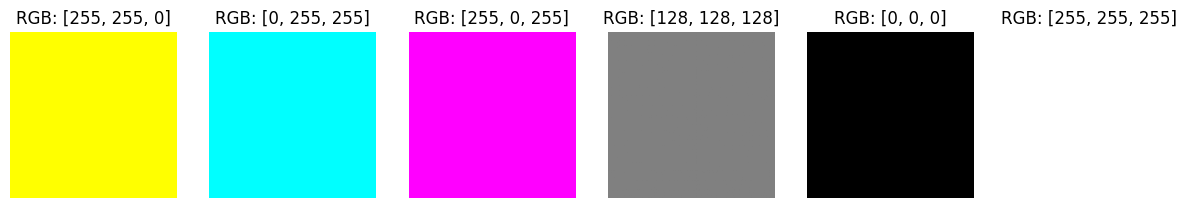

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# RGB 색상을 변화시켜 시각적으로 보여주는 함수 정의
def display_color_changes(rgb_values):
    fig, axes = plt.subplots(1, len(rgb_values), figsize=(15, 5))
    
    for ax, rgb in zip(axes, rgb_values):
        # 각 RGB 값을 [0, 1] 범위로 정규화하여 색상을 생성
        ax.imshow(np.ones((100, 100, 3)) * np.array(rgb)/255)
        # 제목에 RGB 값을 표시
        ax.set_title(f'RGB: {rgb}')
        ax.axis('off')  # 축을 끔
    
    plt.show()

# 다양한 RGB 값 리스트
rgb_values = [
        [255, 255, 0], # 노란색
    [0, 255, 255], # 청록색
    [255, 0, 255], # 자홍색
    [128, 128, 128], # 회색
    [0, 0, 0], # 검은색
    [255, 255, 255]  # 흰색
]

# 함수 호출
display_color_changes(rgb_values)
